Praca Domowa nr 2 Remigiusz Kamiński

Wstęp:

W tej pracy domowej zajme się zestawem danych mówiącym o cenach domów w stanie California w Stanach Zjednoczonych Ameryki. Dane są z roku 1990. Przedstawiają ilość pokoi, ludzi, i tak dalej na podstawie bloków jakby na mapie. Baza sama w sobie jest dosyć rozbudowana, gdyż posiada ponad 20000 wierszy oraz 10 kolumn.

Możemy spojrzeć na mały wycinek danych przed preprocessingiem:

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity

-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY

-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY

-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY

Jak widać są tutaj podane przykładowe dane, warto dodać iż każdy jeden wiersz odpowiada jednemu blokowi.
Następnie zajmiemy się kolejnym zagadnieniem czyli prepocessingiem:

Jeśli chodzi o preprocessing w naszych danych i w 1 i w 2 wersji zamieniłem mediane ceny na przedziały wartości zmieniające się co 50000 dolarów. Niestety baza danych jest dosyć kompletna, aczkolwiek zdarzają się w niej puste wartości dlatego w przypadku 1 wersji wstawiam tam po prostu 0, a w przypadku 2 używam funkcji interpolate(), która ma za zadanie wywnioskować jaka wartość mogłaby tam być, czyli po prostu wynik powinien być bardziej dokładny. Aby zatem zauważyć różnice, którą da nam preprocessing w 1 funkcji na dodatek nie skorzystam ze skalowania i normalizacji danych, a w 2 już tak dzięki czemu teoretycznie 2 powinna być bardziej dokładna. Na dodatek zamieniłem string z ocean_proximity na wartość INT przy pomocy funkcji LabelEncoder. Poniżej znajdują się kody preprocessingu:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('housing.csv', sep=',', header=0)
print(data.columns)
label_encoder = LabelEncoder()
data['ocean_proximity_encoded'] = label_encoder.fit_transform(data['ocean_proximity'])


data = data.fillna(0)
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, float('inf')]
data['median_house_value_category'] = pd.cut(data['median_house_value'], bins=bins, labels=False, right=False)
data = data.drop(['median_house_value', 'ocean_proximity'], axis=1)
data.to_csv('housing_preprocessed.csv', sep=',',index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('housing.csv', sep=',', header=0)
print(data.columns)
label_encoder = LabelEncoder()
data['ocean_proximity_encoded'] = label_encoder.fit_transform(data['ocean_proximity'])
for column in data.columns:
    data[column] = data[column].interpolate()


bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, float('inf')]
data['median_house_value_category'] = pd.cut(data['median_house_value'], bins=bins, labels=False, right=False)
data = data.drop(['median_house_value', 'ocean_proximity'], axis=1)
data.to_csv('housing_preprocessed2.csv', sep=',',index=False)


Po wykonaniu tego preprocessingu, zaczynamy zabawe z podziałem danych na zbiór treningowy oraz testowy. Po wykonaniu tego zadania uczymy algorytmy oraz je testujemy. Do naszej dyspozycji mamy:
Drzewo Decyzyjne
Naiwnego Bayesa
K-najblizszych sasiadow
Sieć neuronowa

Jeśli chodzi o drzewo decyzyjne użyje wersji mniejszej oraz większej (bardziej przycięte gałęzie). K-najblizszych sasiadów otrzyma różne K, a sieć neuronowa pare topologii.

1 część kodu będzie odnosiła się do funkcji mniej przerobionej w preprocessingu, a 2 do tej bardziej.

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

data = pd.read_csv('housing_preprocessed.csv', sep=',', header=0)
# data = pd.read_csv('housing_preprocessed2.csv', sep=',', header=0)
print(data.columns)



X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

label_encoder = LabelEncoder()
y_all = label_encoder.fit_transform(np.concatenate([y_train, y_test]))
y_train = y_all[:len(y_train)]
y_test = y_all[len(y_train):]

# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# normalizer = MinMaxScaler()
# normalizer.fit(X_train)
# X_train = normalizer.transform(X_train)
# X_test = normalizer.transform(X_test)


dtc_small = DecisionTreeClassifier(max_depth=5, random_state=1234)
dtc_large = DecisionTreeClassifier(max_depth=10, random_state=1234)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
knn2 = KNeighborsClassifier(n_neighbors=10)
knn3 = KNeighborsClassifier(n_neighbors=20)
mlp = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, random_state=1234)
mlp2 = MLPClassifier(hidden_layer_sizes=(20,), max_iter=1500, random_state=1234)
mlp3 = MLPClassifier(hidden_layer_sizes=(20, 10, 5), max_iter=1500, random_state=1234)

dtc_small.fit(X_train, y_train)
dtc_large.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
knn2.fit(X_train, y_train)
knn3.fit(X_train, y_train)
mlp.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

y_pred_dtc_small = dtc_small.predict(X_test)
y_pred_dtc_large = dtc_large.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_knn2 = knn2.predict(X_test)
y_pred_knn3 = knn3.predict(X_test)
y_pred_mlp = mlp.predict(X_test)
y_pred_mlp2 = mlp2.predict(X_test)
y_pred_mlp3 = mlp3.predict(X_test)

cm_dtc_small = confusion_matrix(y_test, y_pred_dtc_small)
cm_dtc_large = confusion_matrix(y_test, y_pred_dtc_large)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn2 = confusion_matrix(y_test, y_pred_knn2)
cm_knn3 = confusion_matrix(y_test, y_pred_knn3)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_mlp2 = confusion_matrix(y_test, y_pred_mlp2)
cm_mlp3 = confusion_matrix(y_test, y_pred_mlp3)

print('Dokładnosc dla: DTC small: ', accuracy_score(y_test, y_pred_dtc_small))
print('Dokładnosc dla: DTC large: ', accuracy_score(y_test, y_pred_dtc_large))
print('Dokładnosc dla: NB: ', accuracy_score(y_test, y_pred_nb))
print('Dokładnosc dla: KNN: ', accuracy_score(y_test, y_pred_knn))
print('Dokładnosc dla: KNN2: ', accuracy_score(y_test, y_pred_knn2))
print('Dokładnosc dla: KNN3: ', accuracy_score(y_test, y_pred_knn3))
print('Dokładnosc dla: MLP: ', accuracy_score(y_test, y_pred_mlp))
print('Dokładnosc dla: MLP2: ', accuracy_score(y_test, y_pred_mlp2))
print('Dokładnosc dla: MLP3: ', accuracy_score(y_test, y_pred_mlp3))

print('Macierz błędu dla: DTC small: ', cm_dtc_small)
print('Macierz błędu dla: DTC large: ', cm_dtc_large)
print('Macierz błędu dla: NB: ', cm_nb)
print('Macierz błędu dla: KNN: ', cm_knn)
print('Macierz błędu dla: KNN2: ', cm_knn2)
print('Macierz błędu dla: KNN3: ', cm_knn3)
print('Macierz błędu dla: MLP: ', cm_mlp)
print('Macierz błędu dla: MLP2: ', cm_mlp2)
print('Macierz błędu dla: MLP3: ', cm_mlp3)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_encoded', 'median_house_value_category'],
      dtype='object')
Dokładnosc dla: DTC small:  0.41569767441860467
Dokładnosc dla: DTC large:  0.48594961240310075
Dokładnosc dla: NB:  0.32122093023255816
Dokładnosc dla: KNN:  0.2238372093023256
Dokładnosc dla: KNN2:  0.24200581395348839
Dokładnosc dla: KNN3:  0.2374031007751938
Dokładnosc dla: MLP:  0.27398255813953487
Dokładnosc dla: MLP2:  0.24127906976744187
Dokładnosc dla: MLP3:  0.37306201550387597
Macierz błędu dla: DTC small:  [[  0  36   4   0   1   0   0   0   0   0   0]
 [  0 438 206  17   3   5   0   0   0   0   1]
 [  0 159 426 141  29  34   1   0   0   0   0]
 [  0  23 260 358 126  89   2   0   0   0   1]
 [  0   7 104 158 179 124  20   3   0   0   3]
 [  0   1  43  38 108 141  46   3   0   0   3]
 [  0   0  24  12  63  70  53   7   0   0  11]
 [  0   0  16   5  41 

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# data = pd.read_csv('housing_preprocessed.csv', sep=',', header=0)
data = pd.read_csv('housing_preprocessed2.csv', sep=',', header=0)
print(data.columns)



X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

label_encoder = LabelEncoder()
y_all = label_encoder.fit_transform(np.concatenate([y_train, y_test]))
y_train = y_all[:len(y_train)]
y_test = y_all[len(y_train):]

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)


dtc_small = DecisionTreeClassifier(max_depth=5, random_state=1234)
dtc_large = DecisionTreeClassifier(max_depth=10, random_state=1234)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
knn2 = KNeighborsClassifier(n_neighbors=10)
knn3 = KNeighborsClassifier(n_neighbors=20)
mlp = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, random_state=1234)
mlp2 = MLPClassifier(hidden_layer_sizes=(20,), max_iter=1500, random_state=1234)
mlp3 = MLPClassifier(hidden_layer_sizes=(20, 10, 5), max_iter=1500, random_state=1234)

dtc_small.fit(X_train, y_train)
dtc_large.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
knn2.fit(X_train, y_train)
knn3.fit(X_train, y_train)
mlp.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

y_pred_dtc_small = dtc_small.predict(X_test)
y_pred_dtc_large = dtc_large.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_knn2 = knn2.predict(X_test)
y_pred_knn3 = knn3.predict(X_test)
y_pred_mlp = mlp.predict(X_test)
y_pred_mlp2 = mlp2.predict(X_test)
y_pred_mlp3 = mlp3.predict(X_test)

cm_dtc_small = confusion_matrix(y_test, y_pred_dtc_small)
cm_dtc_large = confusion_matrix(y_test, y_pred_dtc_large)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn2 = confusion_matrix(y_test, y_pred_knn2)
cm_knn3 = confusion_matrix(y_test, y_pred_knn3)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_mlp2 = confusion_matrix(y_test, y_pred_mlp2)
cm_mlp3 = confusion_matrix(y_test, y_pred_mlp3)

print('Dokładnosc dla: DTC small: ', accuracy_score(y_test, y_pred_dtc_small))
print('Dokładnosc dla: DTC large: ', accuracy_score(y_test, y_pred_dtc_large))
print('Dokładnosc dla: NB: ', accuracy_score(y_test, y_pred_nb))
print('Dokładnosc dla: KNN: ', accuracy_score(y_test, y_pred_knn))
print('Dokładnosc dla: KNN2: ', accuracy_score(y_test, y_pred_knn2))
print('Dokładnosc dla: KNN3: ', accuracy_score(y_test, y_pred_knn3))
print('Dokładnosc dla: MLP: ', accuracy_score(y_test, y_pred_mlp))
print('Dokładnosc dla: MLP2: ', accuracy_score(y_test, y_pred_mlp2))
print('Dokładnosc dla: MLP3: ', accuracy_score(y_test, y_pred_mlp3))

print('Macierz błędu dla: DTC small: ', cm_dtc_small)
print('Macierz błędu dla: DTC large: ', cm_dtc_large)
print('Macierz błędu dla: NB: ', cm_nb)
print('Macierz błędu dla: KNN: ', cm_knn)
print('Macierz błędu dla: KNN2: ', cm_knn2)
print('Macierz błędu dla: KNN3: ', cm_knn3)
print('Macierz błędu dla: MLP: ', cm_mlp)
print('Macierz błędu dla: MLP2: ', cm_mlp2)
print('Macierz błędu dla: MLP3: ', cm_mlp3)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_encoded', 'median_house_value_category'],
      dtype='object')
Dokładnosc dla: DTC small:  0.41569767441860467
Dokładnosc dla: DTC large:  0.4844961240310077
Dokładnosc dla: NB:  0.3224321705426357
Dokładnosc dla: KNN:  0.4176356589147287
Dokładnosc dla: KNN2:  0.44476744186046513
Dokładnosc dla: KNN3:  0.4471899224806202
Dokładnosc dla: MLP:  0.4639050387596899
Dokładnosc dla: MLP2:  0.4530038759689923
Dokładnosc dla: MLP3:  0.4745639534883721
Macierz błędu dla: DTC small:  [[  0  36   4   0   1   0   0   0   0   0   0]
 [  0 438 206  17   3   5   0   0   0   0   1]
 [  0 159 426 141  29  34   1   0   0   0   0]
 [  0  23 260 358 126  89   2   0   0   0   1]
 [  0   7 104 158 179 124  20   3   0   0   3]
 [  0   1  43  38 108 141  46   3   0   0   3]
 [  0   0  24  12  63  70  53   7   0   0  11]
 [  0   0  16   5  41  51  

Jeśli spojrzymy na otrzymane wyniki, od razu możemy dostrzec iż nie różnią się one znacząco jeśli chodzi o Drzewo decyzyjne czy też naiwnego bayesa, ale za to jeśli chodzi k-najbliższych sąsiadów i sieć neuronową to bez 2 zdań miało to tutaj znaczenie, aby lepiej to zobaczyć umieszczę wyniki na wykresie.


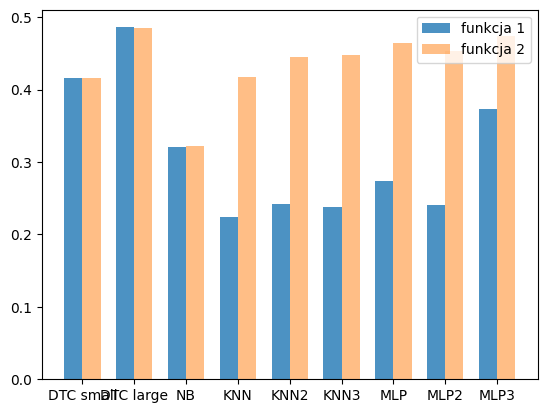

In [15]:
import matplotlib.pyplot as plt

funkcja1 = [0.41569767441860467, 0.48594961240310075, 0.32122093023255816, 0.2238372093023256, 0.24200581395348839, 0.2374031007751938, 0.27398255813953487, 0.24127906976744187, 0.37306201550387597]
funckja2 = [0.41569767441860467, 0.4844961240310077, 0.3224321705426357, 0.4176356589147287, 0.44476744186046513, 0.4471899224806202, 0.4639050387596899, 0.4530038759689923, 0.4745639534883721]

klasy = ['DTC small', 'DTC large', 'NB', 'KNN', 'KNN2', 'KNN3', 'MLP', 'MLP2', 'MLP3']

fig, ax = plt.subplots()
x = np.arange(len(klasy))
width = 0.35
rects1 = ax.bar(x - width/2, funkcja1, width, label='funkcja 1', alpha=0.8)
rects2 = ax.bar(x + width/2, funckja2, width, label='funkcja 2', alpha=0.5)

ax.set_xticks(x)
ax.set_xticklabels(klasy)


ax.legend()
plt.show()


Małe podsumowanie:

Jak widzimy na tym wykresie nasz mocniejszy preprocessing dał duży wzrost procentowy jeśli chodzi o dokładne wyniki dla k-n sąsiadów jak i sieci neuronowych, również widać iż różne k czy też różna topologia, wpływa na dokładność, gdyż różni się ona dla tych klasyfikatorów.